In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import scipy.stats as stats

In [2]:
#Data loading into pandas object

dataset = pd.read_csv("./dataset/mood_dataset.csv", parse_dates=["time"], index_col=0)
dataset["date"] = pd.to_datetime(dataset["time"].dt.date)


print(dataset.head(3))
unique_ids = dataset["id"].unique()
unique_variables = dataset["variable"].unique()
print(f"Amount of IDs {unique_ids.size}")
print(f"Amount of variables {unique_variables.size}")



        id                time variable  value       date
1  AS14.01 2014-02-26 13:00:00     mood    6.0 2014-02-26
2  AS14.01 2014-02-26 15:00:00     mood    6.0 2014-02-26
3  AS14.01 2014-02-26 18:00:00     mood    6.0 2014-02-26
Amount of IDs 27
Amount of variables 19


In [3]:

dataEngineeredDict = {"id":[], "date":[]}
for var in dataset["variable"].unique():
    dataEngineeredDict[var] = []

for id in dataset["id"].unique():
    idFrame = dataset[dataset["id"]==id]
    startDate = idFrame["date"].min()
    endDate = idFrame["date"].max()
    for date in pd.date_range(startDate, endDate):
        dataEngineeredDict["id"].append(id)
        dataEngineeredDict["date"].append(date)
        idDateFrame = idFrame[idFrame["date"]==date]
        for uvar in dataset["variable"].unique():
            if uvar in ["mood", "circumplex.arousal", "circumplex.valence", "activity"]:
                dataEngineeredDict[uvar].append(idDateFrame[idDateFrame["variable"]==uvar]["value"].mean())
            else:
                dataEngineeredDict[uvar].append(idDateFrame[idDateFrame["variable"]==uvar]["value"].sum())
                
engineeredFrame = pd.DataFrame(dataEngineeredDict)
engineeredFrame.head()


,id,date,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,0.0,7.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,0.0,2.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


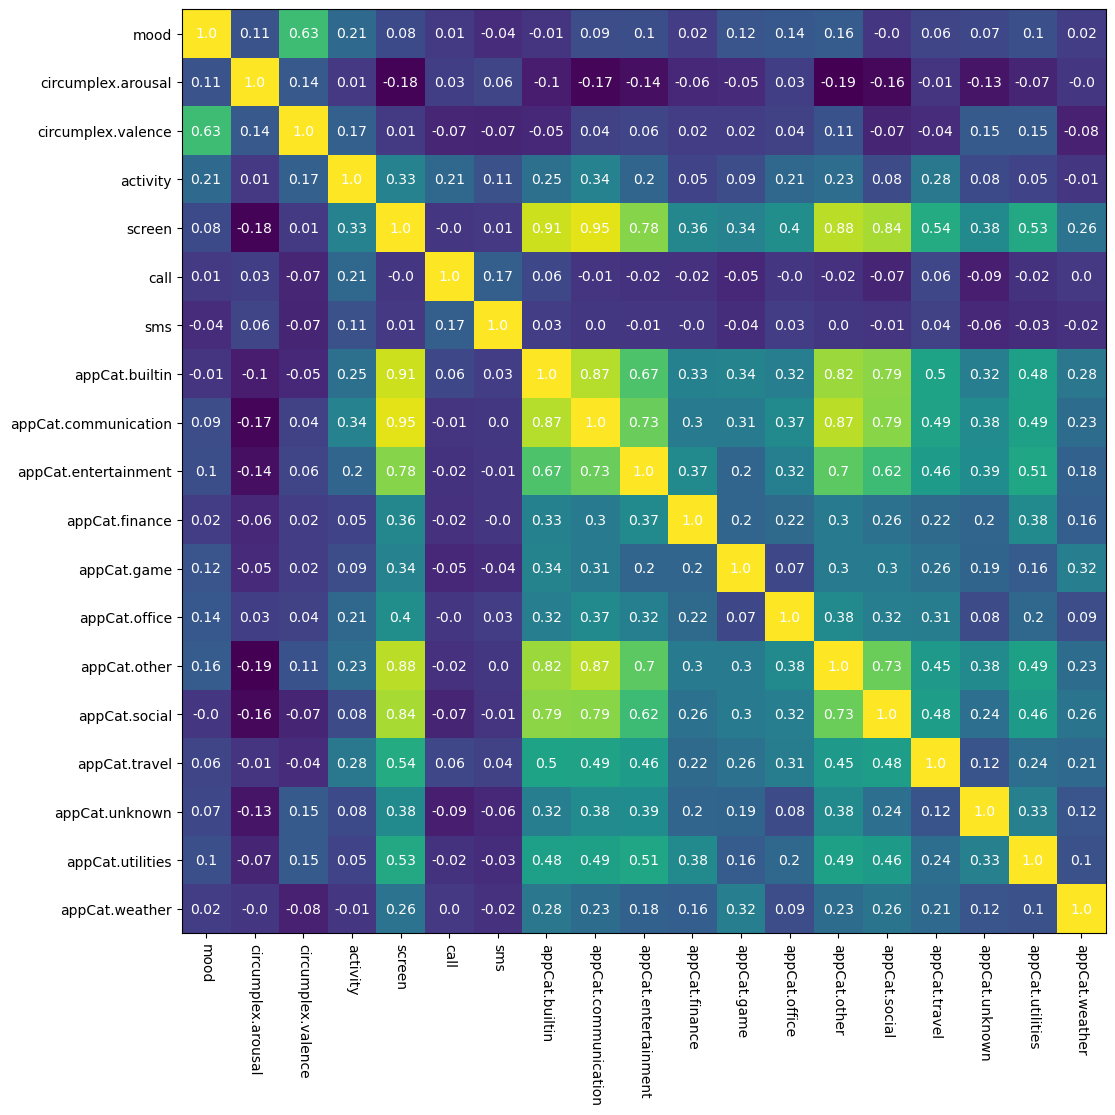

In [29]:

engineeredFrameDroppedDate = engineeredFrame.drop(["id","date"], axis=1)
spearmancor = stats.spearmanr(engineeredFrameDroppedDate, nan_policy='omit')

fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(spearmancor.statistic)
ax.set_xticks(np.arange(len(unique_variables)), labels=unique_variables)
ax.set_yticks(np.arange(len(unique_variables)), labels=unique_variables)
plt.setp(ax.get_xticklabels(), rotation=-90)

for i in range(len(unique_variables)):
    for j in range(len(unique_variables)):
        text = ax.text(j, i, round(spearmancor.statistic[i,j], 2), ha="center", va="center", color="w")
plt.show()



ValueError: x and y must have same first dimension, but have shapes (113,) and (78,)

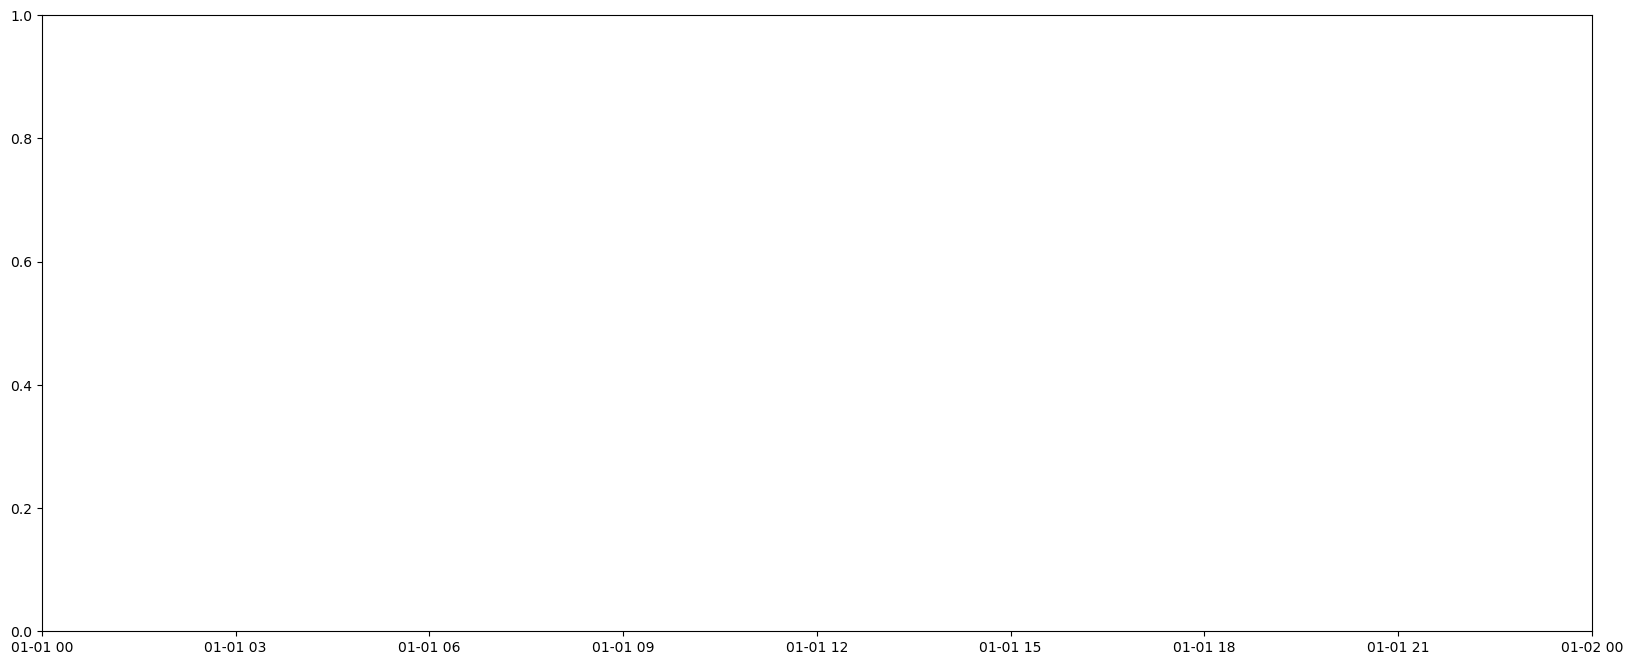

In [4]:
fig, ax = plt.subplots(figsize=(20, 8))

x = pd.date_range(engineeredFrame["date"].min(), engineeredFrame["date"].max())
varu = "mood"

for uid in engineeredFrame["id"].unique():
    vals =  engineeredFrame[engineeredFrame["id"]==uid][varu].map(np.nan_to_num).to_numpy()
    y = np.zeros(len(x))
    y = y[]
    
    ax.plot(x, engineeredFrame[engineeredFrame["id"]==uid][varu], label=uid)

ax.set_title("Mood over dates for all individuals")
ax.set_ylabel("Mood level")
ax.set_ylim(0, 10)

ax.set_xlabel("Dates")
plt.setp(ax.get_xticklabels(), rotation=90)
ax.legend(loc="upper left", ncol=4)







In [ ]:
idGroupFrame = dataset.groupby(by="id")
#print(idGroupFrame.head(1))

durationDays = idGroupFrame["date"].max() - idGroupFrame["date"].min()
durationDays = durationDays.apply(lambda x: x.days+1)
#print(durationDays.head(2))


countDays = idGroupFrame["date"].nunique()
#print(countDays.head(2))

x = np.arange(durationDays.count())
width = 0.5

fig, ax = plt.subplots(layout="constrained", figsize=(7.5, 4))

ax.bar(x - width/2, durationDays, width, label="Duration")
ax.bar(x + width/2, countDays, width, label = "Unique days")

ax.set_title("Time between start and end date of research")
ax.set_ylabel("Days")
ax.set_ylim(0, 110)
ax.set_xticks(x, durationDays.index)
ax.set_xlabel("ID's")
plt.setp(ax.get_xticklabels(), rotation=90)
ax.legend(loc="upper left", ncol=2)

plt.show()


In [ ]:
idMoodFrame = dataset[dataset["variable"]=="mood"].drop(["time","date"],axis=1)
idMoodFrame

x = np.arange(10)

fig, ax = plt.subplots(figsize=(10,6))

for id in idMoodFrame["id"].unique():
    ax.hist(idMoodFrame[idMoodFrame["id"]==id]["value"], histtype="step", label=id, bins=10)

ax.set_xlim(1,10)
ax.legend()
plt.show()


